In [1]:
# in this notebook I will go through the nondimensionalization as it stands for the current model
# I will also outline questions for Greg regarding now nondimensionalization "works" for our next meeting
# other "To-Dos" today include implementing the adaptive timestep with the model code as stands
# and reading a paper (tucker and van der beek 2013 - deals with dimensionless stuff)

### Goal: non-dimensionalize these equations, come up with reasonable scales, and define questions relating to how to make use of this method in understanding our model behavior

1. Here are our basic equations. If we can make the terms on the righthand side dimensionless, then the solution will also be dimensionless.

> $$ \eta = \eta_b + H \hspace{1cm} \rightarrow \hspace{1cm} \frac{\partial \eta}{\partial t} = \frac{\partial \eta_b}{\partial t} + \frac{\partial H}{\partial t}$$

2. We start by defining dimensionless versions of our major variables - vertical height (3 terms here - the total height $\eta$, the bedrock height $\eta_b$, and the alluvial thickness $H$), horizontal position ($x$), and time ($t$). We do this by dividing each of these variables by a scale that has the same dimension (either length or time) as the variable that we seek to non-dimensionalize. We'll worry about defining what the scales for horizontal position ($l$) and time ($T$) should be later. We already have a handy scale for vertical height ($H^*$), so we use that for our vertical height scale here.

>$$\eta' = \frac{\eta}{H^*} \hspace{1cm} \rightarrow \hspace{1cm} \eta = \eta'H^*$$

>$$\eta_b' = \frac{\eta_b}{H^*} \hspace{1cm} \rightarrow \hspace{1cm} \eta_b = \eta_b'H^*$$

>$$H' = \frac{H}{H^*} \hspace{1cm} \rightarrow \hspace{1cm} H = H'H^*$$

>$$x' = \frac{x}{l} \hspace{1cm} \rightarrow \hspace{1cm} x = x'l$$

>$$t' = \frac{t}{T} \hspace{1cm} \rightarrow \hspace{1cm} t = t'T$$


3. We'll start by working on the bedrock bit. Bedrock elevation is going to be a function of uplift, plucking, and abrasion:

> $$\frac{\partial \eta_b}{\partial t} = {U} - E_\text{total} = {U} -(kqS + \beta q_s)$$

> For ease of LaTeX-ing, I've left off the "e-factor." It shouldn't make a difference in our non-dimensionalizing anyway because it's already dimensionless.

4. Start with a few substitutions:

> $$q = rx$$
> Unit discharge $[L^2/T]$ is equal to a runoff rate multiplied by distance downstream

>$$S = \frac{\partial \eta}{\partial x}$$
> Slope is equal to the change in total elevation over a distance

>$$q_s = cqS \hspace{1cm} \rightarrow \hspace{1cm} q_s = crx\frac{\partial \eta}{\partial x}$$
> Bed sediment flux is equal to the discharge times slope times some factor that determines the fraction carried as bed sediment (function of grain size, roughness, etc). This equation should also be multiplied by the "e-factor," but again we'll skip that for now.

5. So now we have:
> $$\frac{\partial \eta_b}{\partial t} = {U} - krx\frac{\partial \eta}{\partial x} - \beta crx\frac{\partial \eta}{\partial x}$$
> This is just another way of writing that bedrock elevation is equal to elevation gained from uplift minus elevation lost to plucking and abrasion.

6. Now time for a bunch of substitutions. Any place where we see one of our major dimensional variables, we want to replace it with its non-dimensional form.

> $$\frac{\partial \eta_b'H^*}{\partial t'T} = U - krx'l\frac{\partial \eta'H^*}{\partial x'l} - \beta crx'l\frac{\partial \eta'H^*}{\partial x'l}$$

7. Pull constants out of derivatives:

> $$\frac{H^*}{T} \frac{\partial \eta_b'}{\partial t'} = U - \frac{H^*}{l}krx'l\frac{\partial \eta'}{\partial x'} - \frac{H^*}{l}\beta crx'l\frac{\partial \eta'}{\partial x'}$$

8. Rearrange to isolate the derivative on the lefthand side:

> $$\frac{\partial \eta_b'}{\partial t'} = \frac{T}{H^*} U - \frac{T}{H^*}\frac{H^*}{l}krx'l\frac{\partial \eta'}{\partial x'} - \frac{T}{H^*}\frac{H^*}{l}\beta crx'l\frac{\partial \eta'}{\partial x'}$$

9. And cancel a bunch of stuff!

> $$\boxed{\frac{\partial \eta_b'}{\partial t'} = \frac{T}{H^*} U - Tkrx'\frac{\partial \eta'}{\partial x'} - T\beta crx'\frac{\partial \eta'}{\partial x'}}$$

> Wahoo! We can check that these are all dimensionless terms now by recalling the dimensions of each variable and making sure they all cancel for both terms on the righthand side. Reminder: $k = [1/L]$ in our case.

> BUT, we still need to define $T$, our timescale (and $l$, out length scale, if that hadn't canceled). We'll do that in a bit, but first we'll repeat these steps for the other term in our governing equation: the alluvial thickness. 

10. For this next part, start by writing the equation for our change in alluvial thickness in more complete terms.

> $$\frac{\partial H}{\partial t} = -\phi \left(\frac{\partial q_s}{\partial x} + \frac{q_s}{\lambda} - \text{sediment generated from plucking}\right)$$

11. Next, make some simplifications and substitutions. We can drop $\phi$ (because it's already dimensionless), distribute the minus sign, and rearrange terms into a move intuitive order. We can replace the grain attrition term with $\beta$, since abrasion coefficients are approximately 1/$\lambda$, where $\lambda$ is the Sternberg length.

> $$\frac{\partial H}{\partial t} = \text{sediment generated from plucking} - \frac{\partial q_s}{\partial x} - \beta q_s$$

12. And finally, we can replace the text bit with the actual formula for sediment generated from plucking, and the $q_s$ with its alternate formulation, as well (from above):

> $$\frac{\partial H}{\partial t} =  krx\frac{\partial \eta}{\partial x} - \frac{\partial \left(crx\frac{\partial \eta}{\partial x}\right)}{\partial x} - \beta crx\frac{\partial \eta}{\partial x}$$

13. Okay, now replace all of our major variables with their dimensionless forms (and also pull some constants out of the second derivative):

> $$\frac{\partial H'H^*}{\partial t'T} =  krx'l\frac{\partial \eta' H^*}{\partial x' l} - crx' l\frac{\partial \left(\frac{\partial \eta' H^*}{\partial x' l}\right)}{\partial x' l} - \beta crx' l\frac{\partial \eta' H^*}{\partial x' l}$$

14. Simplify the derivative in the middle term:

> $$\frac{\partial H'H^*}{\partial t'T} =  krx'l\frac{\partial \eta' H^*}{\partial x' l} - crx' l\frac{\partial^2 \eta' H^*}{\partial (x' l)^2} - \beta crx' l\frac{\partial \eta' H^*}{\partial x' l}$$

15. Pull out constants:

> $$\frac{H^*}{T} \frac{\partial H'}{\partial t'} =  \frac{H^*}{l} krx'l\frac{\partial \eta'}{\partial x'} - \frac{H^*}{l^2} crx' l\frac{\partial^2 \eta'}{\partial x'^2} - \frac{H^*}{l}\beta crx' l\frac{\partial \eta'}{\partial x'}$$

16. Isolate the derivative on the LHS by rearranging and distributing the constants:

> $$\frac{\partial H'}{\partial t'} =  \frac{T}{H^*} \frac{H^*}{l} krx'l\frac{\partial \eta'}{\partial x'} - \frac{T}{H^*} \frac{H^*}{l^2} crx' l\frac{\partial^2 \eta'}{\partial x'^2} - \frac{T}{H^*} \frac{H^*}{l}\beta crx' l\frac{\partial \eta'}{\partial x'}$$

17. Cancel:

> $$\boxed{\frac{\partial H'}{\partial t'} =  Tkrx'\frac{\partial \eta'}{\partial x'} - \frac{T}{l} crx' \frac{\partial^2 \eta'}{\partial x'^2} - T\beta crx' \frac{\partial \eta'}{\partial x'}}$$

18. Okay, it is now time to come up with reasonable scales for all of our scaling factors, substitute those into our boxed equations, do some more simplifying, and then we will have our "dimensionless groups." For starters, here's a refresher of the two equations we've arrived at that we'll be plugging our newly-defined scales into:

> For bedrock:
> $$\boxed{\frac{\partial \eta_b'}{\partial t'} = \color{red}{\frac{T}{H^*} U'R} - Tkrx'\frac{\partial \eta'}{\partial x'} - T\beta crx'\frac{\partial \eta'}{\partial x'}}$$

> And for alluvium:
> $$\boxed{\frac{\partial H'}{\partial t'} =  Tkrx'\frac{\partial \eta'}{\partial x'} - \frac{T}{l} crx' \frac{\partial^2 \eta'}{\partial x'^2} - T\beta crx' \frac{\partial \eta'}{\partial x'}}$$

> So, we need to come up with what $T$, $l$, and $R$ should be. For $T$, use the time to transport a given unit volume of sediment; for $l$, use the length scale of a saltation; for $R$, use the rate of plucking over a waterfall at the outlet, i.e. where $\text{slope} = 1$ and $x = 1$ (i.e., the full length of the domain):
>> $$T = \frac{\text{volume}}{\text{rate}} = \frac{H^*}{\beta} \frac{\beta}{cr} = \frac{H^*}{cr}$$
>> $$l = \frac{1}{\beta}$$

19. Alright, time to replace the scale factors in our boxed equations:

> For bedrock:
> $$\frac{\partial \eta_b'}{\partial t'} = \frac{H^*}{crH^*} U - \frac{H^*}{cr} krx'\frac{\partial \eta'}{\partial x'} - \frac{H^*}{cr} \beta crx'\frac{\partial \eta'}{\partial x'}$$

> For alluvium:
> $$\frac{\partial H'}{\partial t'} =  \frac{H^*}{cr}krx' \frac{\partial \eta'}{\partial x'} - \frac{H^*}{cr} \beta crx' \frac{\partial^2 \eta'}{\partial x'^2} - \frac{H^*}{cr} \beta crx' \frac{\partial \eta'}{\partial x'}$$

20. Okay, now time to cancel a whole bunch of stuff:

> For bedrock:
> $$\frac{\partial \eta_b'}{\partial t'} = \frac{U}{cr} - \frac{H^* k}{c} x'\frac{\partial \eta'}{\partial x'} - H^* \beta x'\frac{\partial \eta'}{\partial x'}$$

> For alluvium:
> $$\frac{\partial H'}{\partial t'} =  \frac{H^* k}{c}x'\frac{\partial \eta'}{\partial x'} - H^* \beta x' \frac{\partial^2 \eta'}{\partial x'^2} - H^* \beta x' \frac{\partial \eta'}{\partial x'}$$

21. Finally, we can identify three dimensionless groups and the terms that they control:

> $$\color{blue}{\frac{U}{cr}}$$
> This is an "uplift-transport number." It is dimensionless. It is small when uplift is slow/climate is wet/sediment is easy to carry. It is large when uplift is rapid/climate is dry/sediment is difficult to carry. 


> $$\color{blue}{\frac{H^* k}{c}}$$
> Controls bedrock erosion via plucking. Think of this as detachment-transport ratio. If rocks are tough, this number is small and system is more DTL. If rocks are weak (or c is small, indicating little bed roughness), this number is big, and system is more TPL.

> $$\color{blue}{H^* \beta}$$
> Attrition scale. If 1, attrition is instantaneous. In reality, this value should be << 1.

## Questions:

1. What does it mean to write model in dimensionless space - particularly as this relates to the timestep being dimensional? (I think Greg said he prefers to write models dimensionlessly.)


2. Does uplift need to be included in the bedrock elevation equation? If so, does it need to be modified with a dimensionless coefficient?


3. My plan is run the model with different values of beta, H*, etc., and to pull out and plot those metrics which should depend on these dimensionless coefficients. For example, the plucking rate should be the same whether beta is doubled or k is doubled. But is this a reasonable expectation? Changing beta will also impact the behavior of all directly "sediment-dependent" processes, which will in turn effect sediment cover and therefore bedrock erosion rate... but maybe the idea is that the increase in bedrock plucking due to increased bed exposure from increasing beta will have the exact same effect as increase in plucking from higher k?


4. Is it wrong that this resolves to less than four dimensionless groups? Or are there other dimensionless groups, just not represented here?

Up next:
- write code as a loop over a function (will make it a lot easier to test lots of cases)
- compare output metrics
- think about: what predictions should I make for metrics such as total erosion rate? Total erosion rate is a sum of bedrock and sediment processes, and these have different dimensionless coefficients associated with them, so I can't as easily perform an experiment that tests just one factor and expect linear behavior.

In [2]:
# okay, now it's time to test out some of this on our model
# we'll use the adaptive timestep and tweak parameters such as beta, Hstar, and c slightly
# then we'll plot a bunch of output metrics
# and think about how they compare with tweaking of those different variables in our dimensionless coefficients

In [3]:
# start by importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# first, write a little test to see if my "break at steady state" thing is working:

In [5]:
z = np.zeros(10)
rate = 0.2
final_elev = 10
steps = 80

for i in range(steps):
    z += rate
    if any(z[:] < final_elev):
        continue
    else:
        break
        
print(i)
print(z)

# okay, this captures the general idea

50
[10.2 10.2 10.2 10.2 10.2 10.2 10.2 10.2 10.2 10.2]


In [6]:
# and, a little test case to make sure the method we want to use to track our model runs is working as expected

In [7]:
# define a function
def x_and_y(x, y):
    total = x + y
    product = x * y
    
    return total, product

# now write some lists
list1 = [4, 5]
list2 = [7, 3]
list3 = [1, 2]

# now make a list of lists
big_list = [list1, list2, list3]

# now track some information about each instance of the function for different inputs
# by making a list of dictionaries that stores the info
runs = []

for i in range(0, 3, 1):
    runs.append({})
    runs[i]['name'] = 'run ' + str(i)
    runs[i]['inputs'] = big_list[i]
    runs[i]['sum'] = x_and_y(*big_list[i])[0]
    runs[i]['product'] = x_and_y(*big_list[i])[1]
    
# now try to access, for example, the product from the second (index 1) run    
runs[1]['product']

21

In [8]:
# okay, still need more practice to really get a handle on this, but good enough for now
# move on to setting up our model

In [9]:
# SET UP GRID ARRAYS
dx = 1000
x = np.arange(0, 100000, dx)

# set up references to topography
Hstar = 1
H = Hstar + np.zeros(len(x))
etab = -H
eta = etab + H

# abrasion coefficients from Attal and Lave 2006 in % per km
beta_ig = np.zeros(len(x))
beta_ig[:25] = 0.000004
beta_sed = np.zeros(len(x))
beta_sed[25:] = 0.000064
atr_factor = 0.000004

# erodibility values
k_ig = np.zeros(len(x))
k_ig[:25] = 0.0001
k_sed = np.zeros(len(x))
k_sed[25:] = 0.001

In [14]:
# write a function that has two bedrock lithologies in the domain, but only one contributing sediment to bedload
def two_lith_one_sed(x,
                     dx,
                     Hstar,
                     H,
                     etab,
                     eta,
                     beta_ig,
                     beta_sed,
                     atr_factor,
                     k_ig,
                     k_sed,
                     c = 1,
                     r = 1,
                     baselevel_rate = 0.001,
                     num_steps = 850000, 
                     porosity = 0.55):
    
    H[-1] = 0.0
    bedrock_ero = np.zeros(len(x))  # bedrock erosion rate
    sedimentation_rate = np.zeros(len(x))
    total_ero = np.zeros(len(x))
    total_ero[-1] = baselevel_rate
    total_plucking = np.zeros(len(x))
    total_plucking[-1] = baselevel_rate
    total_plucking_ig = np.zeros(len(x))
    total_plucking_ig[-1] = baselevel_rate
    total_plucking_sed = np.zeros(len(x))
    total_plucking_sed[-1] = baselevel_rate
    q = r * x  # discharge = distance downstream (first node is left edge of 0th cell)
    qs = np.zeros(len(x))  # first node is left edge of 0th cell
    #dt = 0.2 * dx * dx / (c*q[-1])  # time-step size
    dt_global = 0.2 * dx * dx / (c*q[-1])  # "global" time-step size
    run_duration = dt_global * num_steps  # <== here's how long we want to run
    cum_time = 0.0  # <== keep track of elapsed time

    #for i in range(num_steps):
    while cum_time < run_duration:  # <== use a while loop because dt varies by iteration
        

        # first calculate rates
        
        #  calc slope
        S = -np.diff(eta)/dx
        
        #  calculate e factor
        efac = np.exp(- H / Hstar)
        
        #  calculate total bedload sed flux and set boundary condition
        qs[1:] = c * q[1:] * S * (1.0 - efac[:-1])
        qs[0] = 0
        
        #  calc bedrock erosion from stream power (plucking)
        ero_plucking_ig = efac[:-1] * (k_ig[1:] * q[1:] * S)
        ero_plucking_sed = efac[:-1] * (k_sed[1:] * q[1:] * S)
        
        #  calc bedrock erosion from abrasion
        ero_ab_ig = efac[:-1] * (beta_ig[:-1] * qs[1:])   # <== change indexing: qs[1] represents node 0
        ero_ab_sed = efac[:-1] * (beta_sed[:-1] * qs[1:])
        
        #  calc bedrock erosion rate from stream power and abrasion
        bedrock_ero[:-1] = ero_plucking_ig + ero_plucking_sed + ero_ab_ig + ero_ab_sed
        total_plucking[:-1] = ero_plucking_ig + ero_plucking_sed
        
        #  calc grain attrition rate
        atr = atr_factor * qs[1:]
        
        #  calc rate of change in alluvial thickness
        sedimentation_rate[:-1] = -((1 / porosity) * ((np.diff(qs)/dx) + atr - ero_plucking_ig))
        
        
        # Calculate maximum allowable time-step size
        
        #  track total erosion rate
        total_ero[-1] = bedrock_ero[-1] - sedimentation_rate[-1]  # <== erosion is MINUS sed rate
        
        #  set adaptive timestep
        #  first check time to flat surface
        elev_diff = np.diff(eta)/dx
        ero_diff = np.diff(total_ero)/dx
        #valid_places = np.where(ero_diff < 0)
        valid_places = np.where(ero_diff < 0)[0]  # <== we just want the array, not the full tuple from where()
        if len(valid_places) > 0:  # <== in case there ARE no locations...
            times_to_flat = np.abs(elev_diff[valid_places]/ero_diff[valid_places])
        else:
            times_to_flat = np.array([dt_global])  # <== ...we just revert to the global dt
        min_time_to_flat = np.amin(times_to_flat)

        #  then check time to deplete all sediment
        #sed_depletion_locations = np.where(sedimentation_rate < 0)
        sed_depletion_locations = np.where(sedimentation_rate < 0)[0]  # <== we just want the array, not the full tuple from where()
        if len(sed_depletion_locations) > 0:  # <== in case there ARE no locations...
            times_to_no_sed = np.abs(H[sed_depletion_locations]/sedimentation_rate[sed_depletion_locations])
        else:
            times_to_no_sed = np.array([dt_global])  # <== ...we just revert to the global dt
        min_time_to_no_sed = np.amin(times_to_no_sed)

        #  check for smaller condition
        dt = min(min_time_to_flat, min_time_to_no_sed)

        #  if larger than global step size, limit to global
        dt = min(dt, dt_global)
        
        
        # Update quantities
        
        #  lower baselevel
        eta[-1] -= baselevel_rate * dt 
        
        #  set boundary conditions
        etab[-1] = eta[-1]
        
        #  calc change in bedrock elev
        etab[:-1] -= bedrock_ero[:-1] * dt
        
        # calc total plucking
        total_plucking_ig[:-1] += ero_plucking_ig * dt
        total_plucking_sed[:-1] += ero_plucking_sed * dt
        total_plucking[:-1] += total_plucking[:-1] * dt
        
        #  update sediment thickness
        H[:-1] += sedimentation_rate[:-1] * dt
        H[H < 0] = 0

        #  update elev
        eta[:-1] = etab[:-1] + H[:-1]
        
        # Advance time
        cum_time += dt
        
        if any(total_ero[:] != baselevel_rate):
            continue
        else:
            break
            
    print(cum_time)
        
    return (S, qs, efac, eta, etab, ero_plucking_ig, ero_plucking_sed, ero_ab_ig, ero_ab_sed, bedrock_ero, 
            total_plucking_ig, total_plucking_sed, total_plucking, atr, sedimentation_rate, H, total_ero, cum_time)

In [15]:
# now we'll set up some lists with values we want to test
# the order will be the same as the order of arguments taken by our function
# that is, [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, c, baselevel_rate]

In [16]:
# # set up individual experiments

# control case
control = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, 1, 1]

# # double H* means must also halve beta
double_Hstar = [x, dx, Hstar * 2, H, etab, eta, beta_ig/2, beta_sed/2, atr_factor/2, k_ig, k_sed, 1, 1]

# # double k should be ok on its own
double_k = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig * 2, k_sed * 2, 1, 1]

# # halve c means we must also halve baselevel (uplift) rate
# # if this doesn't work, try rewriting model to take q as an input, and double it
halve_c = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, 1/2, 1 * 2]

# # gather all experiments into one master list
# landscape_experiments = [control, double_Hstar, double_k, halve_c]

# # set up an empty list to hold all model runs
# model_runs = []

# for i in range(len(landscape_experiments)):
#     model_runs.append({})
#     model_runs[i]['name'] = 'Run ' + str(i)
#     model_runs[i]['inputs'] = landscape_experiments[i]
#     model_runs[i]['slope'] = two_lith_one_sed(*landscape_experiments[i])[0]
#     model_runs[i]['sed flux'] = two_lith_one_sed(*landscape_experiments[i])[1]
#     model_runs[i]['e factor'] = two_lith_one_sed(*landscape_experiments[i])[2]
#     model_runs[i]['topography'] = two_lith_one_sed(*landscape_experiments[i])[3]
#     model_runs[i]['bedrock elevation'] = two_lith_one_sed(*landscape_experiments[i])[4]
#     model_runs[i]['igneous plucking rate'] = two_lith_one_sed(*landscape_experiments[i])[5]
#     model_runs[i]['sedimentary plucking rate'] = two_lith_one_sed(*landscape_experiments[i])[6]
#     model_runs[i]['igneous abrasion rate'] = two_lith_one_sed(*landscape_experiments[i])[7]
#     model_runs[i]['sedimentary abrasion rate'] = two_lith_one_sed(*landscape_experiments[i])[8]
#     model_runs[i]['bedrock erosion rate'] = two_lith_one_sed(*landscape_experiments[i])[9]
#     model_runs[i]['total plucking'] = two_lith_one_sed(*landscape_experiments[i])[10]
#     model_runs[i]['attrition rate'] = two_lith_one_sed(*landscape_experiments[i])[11]
#     model_runs[i]['sedimentation rate'] = two_lith_one_sed(*landscape_experiments[i])[12]
#     model_runs[i]['sediment thickness'] = two_lith_one_sed(*landscape_experiments[i])[13]
#     model_runs[i]['total erosion rate'] = two_lith_one_sed(*landscape_experiments[i])[14]

In [17]:
# OK, for some reason the above code block is taking a super long time to run
# instead, we'll just run things individually

# basecase (control)
(slope_control,
 sed_flux_control,
 e_factor_control,
 topography_control,
 bedrock_elevation_control,
 igneous_plucking_rate_control,
 sedimentary_plucking_rate_control,
 igneous_abrasion_rate_control,
 sedimentary_abrasion_rate_control,
 bedrock_erosion_rate_control,
 total_plucking_ig_control,
 total_plucking_sed_control,
 total_plucking_control,
 attrition_rate_control,
 sedimentation_rate_control,
 sediment_thickness_control,
 total_erosion_rate_control,
 cum_time_control) = two_lith_one_sed(*control)

1717173.7373607575


In [18]:
# double Hstar
(slope_double_Hstar,
 sed_flux_double_Hstar,
 e_factor_double_Hstar,
 topography_double_Hstar,
 bedrock_elevation_double_Hstar,
 igneous_plucking_rate_double_Hstar,
 sedimentary_plucking_rate_double_Hstar,
 igneous_abrasion_rate_double_Hstar,
 sedimentary_abrasion_rate_double_Hstar,
 bedrock_erosion_rate_double_Hstar,
 total_plucking_ig_double_Hstar,
 total_plucking_sed_double_Hstar,
 total_plucking_double_Hstar,
 attrition_rate_double_Hstar,
 sedimentation_rate_double_Hstar,
 sediment_thickness_double_Hstar,
 total_erosion_rate_double_Hstar,
 cum_time_double_Hstar) = two_lith_one_sed(*double_Hstar)

# double k
(slope_double_k,
 sed_flux_double_k,
 e_factor_double_k,
 topography_double_k,
 bedrock_elevation_double_k,
 igneous_plucking_rate_double_k,
 sedimentary_plucking_rate_double_k,
 igneous_abrasion_rate_double_k,
 sedimentary_abrasion_rate_double_k,
 bedrock_erosion_rate_double_k,
 total_plucking_ig_double_k,
 total_plucking_sed_double_k,
 total_plucking_double_k,
 attrition_rate_double_k,
 sedimentation_rate_double_k,
 sediment_thickness_double_k,
 total_erosion_rate_double_k,
 cum_time_double_k) = two_lith_one_sed(*double_k)

# halve c
(slope_halve_c,
 sed_flux_halve_c,
 e_factor_halve_c,
 topography_halve_c,
 bedrock_elevation_halve_c,
 igneous_plucking_rate_halve_c,
 sedimentary_plucking_rate_halve_c,
 igneous_abrasion_rate_halve_c,
 sedimentary_abrasion_rate_halve_c,
 bedrock_erosion_rate_halve_c,
 total_plucking_ig_halve_c,
 total_plucking_sed_halve_c,
 total_plucking_halve_c,
 attrition_rate_halve_c,
 sedimentation_rate_halve_c,
 sediment_thickness_halve_c,
 total_erosion_rate_halve_c,
 cum_time_halve_c) = two_lith_one_sed(*halve_c)

1717173.7373607575
1717173.7373607575
1717173.7373607575


In [19]:
print(cum_time_control)
print(cum_time_double_Hstar)
print(cum_time_double_k)
print(cum_time_halve_c)

1717173.7373607575
1717173.7373607575
1717173.7373607575
1717173.7373607575


In [20]:
# now create several sets of experiments to plot together:

# double Hstar and double k (should have the same effect on plucking)

# double Hstar and halve c (should have same effect on plucking)

# double k and halve c (should have same effect on plucking)

Text(0.5, 1.0, 'double k and halve c')

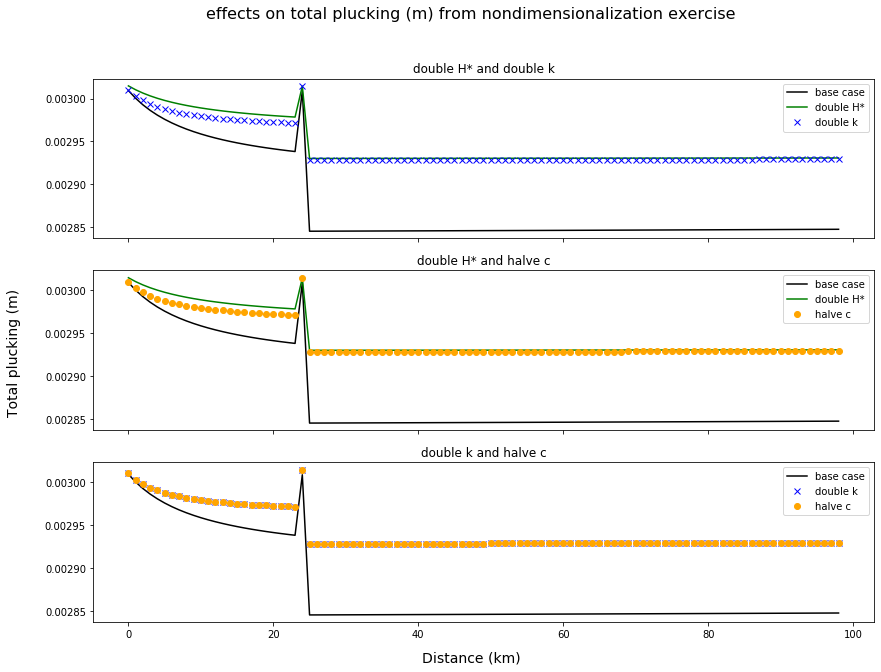

In [21]:
fig, axs = plt.subplots(3, figsize = (14, 10), sharex = True, sharey = True)
fig.suptitle('effects on total plucking (m) from nondimensionalization exercise', fontsize = 16)

fig.text(0.5, 0.07, 'Distance (km)', ha='center', fontsize = 14)
fig.text(0.04, 0.5, 'Total plucking (m)', va='center', rotation='vertical', fontsize = 14)

axs[0].plot(x[:-1]/1000, total_plucking_control[:-1], label = 'base case', color = 'k')
axs[0].plot(x[:-1]/1000, total_plucking_double_Hstar[:-1], label = 'double H*', color = 'green')
axs[0].plot(x[:-1]/1000, total_plucking_double_k[:-1], 'x', label = 'double k', color = 'blue')
axs[0].legend()
axs[0].set_title('double H* and double k')

axs[1].plot(x[:-1]/1000, total_plucking_control[:-1], label = 'base case', color = 'k')
axs[1].plot(x[:-1]/1000, total_plucking_double_Hstar[:-1], label = 'double H*', color = 'green')
axs[1].plot(x[:-1]/1000, total_plucking_halve_c[:-1], 'o', label = 'halve c', color = 'orange')
axs[1].legend()
axs[1].set_title('double H* and halve c')

axs[2].plot(x[:-1]/1000, total_plucking_control[:-1], label = 'base case', color = 'k')
axs[2].plot(x[:-1]/1000, total_plucking_double_k[:-1], 'x', label = 'double k', color = 'blue')
axs[2].plot(x[:-1]/1000, total_plucking_halve_c[:-1], 'o', label = 'halve c', color = 'orange')
axs[2].legend()
axs[2].set_title('double k and halve c')

# plt.savefig('/Users/vanessa/Desktop/FA 2021/outputs for 11_10_21 meeting/demonstration of working scheme.png')

In [22]:
total_plucking_double_Hstar - total_plucking_double_k

array([4.52928678e-06, 7.08649594e-06, 8.55172678e-06, 9.37847725e-06,
       9.81694480e-06, 1.00126123e-05, 1.00536350e-05, 9.99520916e-06,
       9.87281000e-06, 9.70971528e-06, 9.52144732e-06, 9.31848100e-06,
       9.10794114e-06, 8.89469186e-06, 8.68205056e-06, 8.47226427e-06,
       8.26683253e-06, 8.06672931e-06, 7.87255742e-06, 7.68465692e-06,
       7.50318208e-06, 7.32815634e-06, 7.15951179e-06, 6.99711769e-06,
       1.18099755e-07, 1.73829402e-06, 1.73779319e-06, 1.73727639e-06,
       1.73674353e-06, 1.73619454e-06, 1.73562934e-06, 1.73504781e-06,
       1.73444990e-06, 1.73383551e-06, 1.73320455e-06, 1.73255694e-06,
       1.73189258e-06, 1.73121141e-06, 1.73051331e-06, 1.72979821e-06,
       1.72906602e-06, 1.72831664e-06, 1.72755001e-06, 1.72676601e-06,
       1.72596455e-06, 1.72514556e-06, 1.72430894e-06, 1.72345459e-06,
       1.72258245e-06, 1.72169238e-06, 1.72078433e-06, 1.71985818e-06,
       1.71891386e-06, 1.71795127e-06, 1.71697030e-06, 1.71597088e-06,
      

In [23]:
# excellent! 
# We see that we can force the same plucking behavior 
# by changing any of the parameters in the dimensionless coeffcients 
# (and likewise making changes to other parameters in the uplift and abrasion dimensionless groups 
# to keep those values the same)
# the runs above are at steady state
# if we make these plots before steady state, 
# then we see that although the systems come to the same final "resting point,"
# they take different paths and times to get there. So that's neat to observe, too.

In [24]:
# real quick, make sure all above are actually at steady state
print(bedrock_erosion_rate_control)
print(bedrock_erosion_rate_double_Hstar)
print(bedrock_erosion_rate_double_k)
print(bedrock_erosion_rate_halve_c)

[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.   ]
[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 

In [25]:
# alright, now set up a bunch of experiments where we tweak Hstar
# anything we do to Hstar, do the opposite to beta terms

# control will stay the same, just putting it here for context:
# control = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, 1, 1]

# exp 1
exp_1 = [x, dx, Hstar/10, H, etab, eta, beta_ig * 10, beta_sed * 10, atr_factor * 10, k_ig, k_sed, 1, 1]

# exp 2
exp_2 = [x, dx, Hstar/2, H, etab, eta, beta_ig * 2, beta_sed * 2, atr_factor * 2, k_ig, k_sed, 1, 1]

# exp 3
exp_3 = [x, dx, Hstar * 1.5, H, etab, eta, beta_ig / 1.5, beta_sed / 1.5, atr_factor / 1.5, k_ig, k_sed, 1, 1]

# exp 4
exp_4 = [x, dx, Hstar * 2, H, etab, eta, beta_ig / 2, beta_sed / 2, atr_factor / 2, k_ig, k_sed, 1, 1]

# exp 5
exp_5 = [x, dx, Hstar * 2.5, H, etab, eta, beta_ig / 2.5, beta_sed / 2.5, atr_factor / 2.5, k_ig, k_sed, 1, 1]

# exp 6
exp_6 = [x, dx, Hstar * 3, H, etab, eta, beta_ig / 3, beta_sed / 3, atr_factor / 3, k_ig, k_sed, 1, 1]

In [26]:
# now unpack all of these

# exp 1
(slope_exp1,
 sed_flux_exp1,
 e_factor_exp1,
 topography_exp1,
 bedrock_elevation_exp1,
 igneous_plucking_rate_exp1,
 sedimentary_plucking_rate_exp1,
 igneous_abrasion_rate_exp1,
 sedimentary_abrasion_rate_exp1,
 bedrock_erosion_rate_exp1,
 total_plucking_ig_exp1,
 total_plucking_sed_exp1,
 total_plucking_exp1,
 attrition_rate_exp1,
 sedimentation_rate_exp1,
 sediment_thickness_exp1,
 total_erosion_rate_exp1,
 cum_time_exp1) = two_lith_one_sed(*exp_1)

# exp 2
(slope_exp2,
 sed_flux_exp2,
 e_factor_exp2,
 topography_exp2,
 bedrock_elevation_exp2,
 igneous_plucking_rate_exp2,
 sedimentary_plucking_rate_exp2,
 igneous_abrasion_rate_exp2,
 sedimentary_abrasion_rate_exp2,
 bedrock_erosion_rate_exp2,
 total_plucking_ig_exp2,
 total_plucking_sed_exp2,
 total_plucking_exp2,
 attrition_rate_exp2,
 sedimentation_rate_exp2,
 sediment_thickness_exp2,
 total_erosion_rate_exp2,
 cum_time_exp2) = two_lith_one_sed(*exp_2)

# exp 3
(slope_exp3,
 sed_flux_exp3,
 e_factor_exp3,
 topography_exp3,
 bedrock_elevation_exp3,
 igneous_plucking_rate_exp3,
 sedimentary_plucking_rate_exp3,
 igneous_abrasion_rate_exp3,
 sedimentary_abrasion_rate_exp3,
 bedrock_erosion_rate_exp3,
 total_plucking_ig_exp3,
 total_plucking_sed_exp3,
 total_plucking_exp3,
 attrition_rate_exp3,
 sedimentation_rate_exp3,
 sediment_thickness_exp3,
 total_erosion_rate_exp3,
 cum_time_exp3) = two_lith_one_sed(*exp_3)

# exp 4
(slope_exp4,
 sed_flux_exp4,
 e_factor_exp4,
 topography_exp4,
 bedrock_elevation_exp4,
 igneous_plucking_rate_exp4,
 sedimentary_plucking_rate_exp4,
 igneous_abrasion_rate_exp4,
 sedimentary_abrasion_rate_exp4,
 bedrock_erosion_rate_exp4,
 total_plucking_ig_exp4,
 total_plucking_sed_exp4,
 total_plucking_exp4,
 attrition_rate_exp4,
 sedimentation_rate_exp4,
 sediment_thickness_exp4,
 total_erosion_rate_exp4,
 cum_time_exp4) = two_lith_one_sed(*exp_4)

# exp 5
(slope_exp5,
 sed_flux_exp5,
 e_factor_exp5,
 topography_exp5,
 bedrock_elevation_exp5,
 igneous_plucking_rate_exp5,
 sedimentary_plucking_rate_exp5,
 igneous_abrasion_rate_exp5,
 sedimentary_abrasion_rate_exp5,
 bedrock_erosion_rate_exp5,
 total_plucking_ig_exp5,
 total_plucking_sed_exp5,
 total_plucking_exp5,
 attrition_rate_exp5,
 sedimentation_rate_exp5,
 sediment_thickness_exp5,
 total_erosion_rate_exp5,
 cum_time_exp5) = two_lith_one_sed(*exp_5)

# exp 6
(slope_exp6,
 sed_flux_exp6,
 e_factor_exp6,
 topography_exp6,
 bedrock_elevation_exp6,
 igneous_plucking_rate_exp6,
 sedimentary_plucking_rate_exp6,
 igneous_abrasion_rate_exp6,
 sedimentary_abrasion_rate_exp6,
 bedrock_erosion_rate_exp6,
 total_plucking_ig_exp6,
 total_plucking_sed_exp6,
 total_plucking_exp6,
 attrition_rate_exp6,
 sedimentation_rate_exp6,
 sediment_thickness_exp6,
 total_erosion_rate_exp6,
 cum_time_exp6) = two_lith_one_sed(*exp_6)

1717172.0980087486
1717173.7373607575
1717173.7373607575
1717173.7373607575
1717173.7373607575
1717173.7373607575


In [27]:
# alright, so now we've run all our experiments with Hstar. 
# we're going to plot the dimensional plucking output from that. 
# but we also want to plot percent change

# calculate percent changes
change0 = ((total_plucking_control - total_plucking_control)/total_plucking_control)*100
change1 = ((total_plucking_exp1 - total_plucking_control)/total_plucking_control)*100
change2 = ((total_plucking_exp2 - total_plucking_control)/total_plucking_control)*100
change3 = ((total_plucking_exp3 - total_plucking_control)/total_plucking_control)*100
change4 = ((total_plucking_exp4 - total_plucking_control)/total_plucking_control)*100
change5 = ((total_plucking_exp5 - total_plucking_control)/total_plucking_control)*100
change6 = ((total_plucking_exp6 - total_plucking_control)/total_plucking_control)*100

Text(0, 0.5, 'percent change in plucking from control')

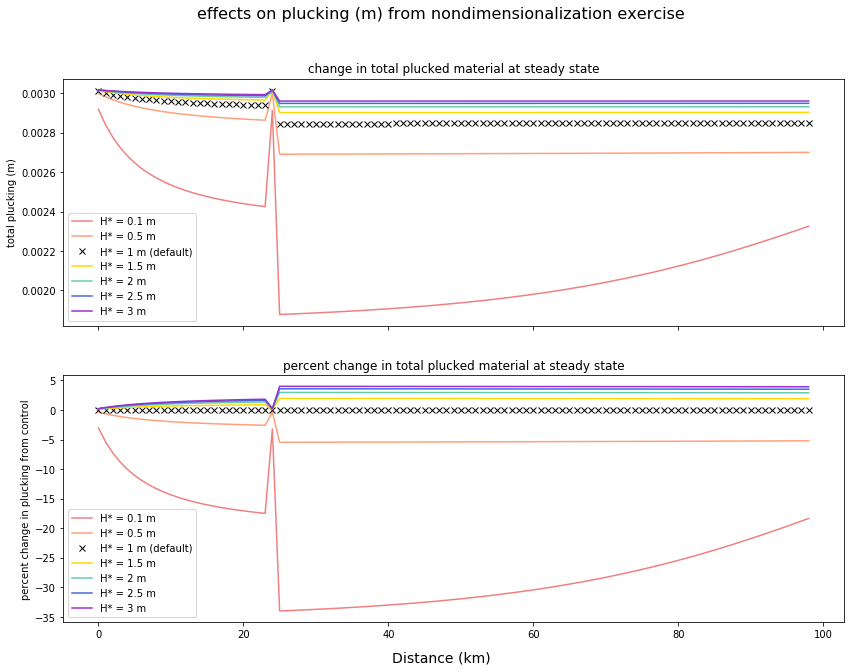

In [28]:
# now create some plots
fig, axs = plt.subplots(2, figsize = (14, 10), sharex = True, sharey = False)
fig.suptitle('effects on plucking (m) from nondimensionalization exercise', fontsize = 16)

fig.text(0.5, 0.07, 'Distance (km)', ha='center', fontsize = 14)

axs[0].plot(x[:-1]/1000, total_plucking_exp1[:-1], label = 'H* = 0.1 m', color = 'lightcoral')
axs[0].plot(x[:-1]/1000, total_plucking_exp2[:-1], label = 'H* = 0.5 m', color = 'lightsalmon')
axs[0].plot(x[:-1]/1000, total_plucking_control[:-1], 'x', label = 'H* = 1 m (default)', color = 'k')
axs[0].plot(x[:-1]/1000, total_plucking_exp3[:-1], label = 'H* = 1.5 m', color = 'gold')
axs[0].plot(x[:-1]/1000, total_plucking_exp4[:-1], label = 'H* = 2 m', color = 'mediumaquamarine')
axs[0].plot(x[:-1]/1000, total_plucking_exp5[:-1], label = 'H* = 2.5 m', color = 'royalblue')
axs[0].plot(x[:-1]/1000, total_plucking_exp6[:-1], label = 'H* = 3 m', color = 'darkorchid')
axs[0].legend()
axs[0].set_title('change in total plucked material at steady state')
axs[0].set_ylabel('total plucking (m)')

axs[1].plot(x[:-1]/1000, change1[:-1], label = 'H* = 0.1 m', color = 'lightcoral')
axs[1].plot(x[:-1]/1000, change2[:-1], label = 'H* = 0.5 m', color = 'lightsalmon')
axs[1].plot(x[:-1]/1000, change0[:-1], 'x', label = 'H* = 1 m (default)', color = 'k')
axs[1].plot(x[:-1]/1000, change3[:-1], label = 'H* = 1.5 m', color = 'gold')
axs[1].plot(x[:-1]/1000, change4[:-1], label = 'H* = 2 m', color = 'mediumaquamarine')
axs[1].plot(x[:-1]/1000, change5[:-1], label = 'H* = 2.5 m', color = 'royalblue')
axs[1].plot(x[:-1]/1000, change6[:-1], label = 'H* = 3 m', color = 'darkorchid')
axs[1].legend()
axs[1].set_title('percent change in total plucked material at steady state')
axs[1].set_ylabel('percent change in plucking from control')

# plt.savefig('/Users/vanessa/Desktop/FA 2021/outputs for 11_10_21 meeting/plucked material.png')

#### Interesting! How to summarize these results?

- As H* gets thinner, plucking decreases everywhere
- This at first seems unintuitive, but actually makes sense
>> plucking rate only depends on sediment cover. Specifying a lower H* means that we require less sediment to consider the bed "fully covered" and thus protected from plucking
>> one surprising thing is that because sediment generation is directly tied to igneous plucking, we should also be slowing the generation of sediment used to cover the bed. 
- <b> For tomorrow: I want to try all of these with sediment being internally generated, rather than starting with a thickness of H* everywhere</b>
>> update on this: for some reason (a bit beyond what I think is important to de-bug at the moment), going to 0 initial sediment makes runtimes super long. So we won't do that, and will just start with a mantle of sediment everywhere of thickness H*. <b>Sometime later, though, I do want to go back and see if the model is running properly when generating sediment internally (by trying shorter runtimes, rather than going to steady state) or if taking away initial sed is leading to funky behavior.</b>

In [29]:
# oh, and as before, check to make sure all "experiment" runs were at steady state
print(bedrock_erosion_rate_exp1)
print(bedrock_erosion_rate_exp2)
print(bedrock_erosion_rate_exp3)
print(bedrock_erosion_rate_exp4)
print(bedrock_erosion_rate_exp5)
print(bedrock_erosion_rate_exp6)

[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.   ]
[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 

In [30]:
# now do some more experiments in which we change beta to look at its effect on attrition rates
# since beta only appears in one dimensionless coeffcient,
# we don't need to alter anything else to "compensate" for this change elsewhere

# exp 7
exp_7 = [x, dx, Hstar, H, etab, eta, beta_ig * 0.5, beta_sed * 0.5, atr_factor * 0.5, k_ig, k_sed, 1, 1]

# exp 8
exp_8 = [x, dx, Hstar, H, etab, eta, beta_ig * 0.75, beta_sed * 0.75, atr_factor * 0.75, k_ig, k_sed, 1, 1]

# exp 9
exp_9 = [x, dx, Hstar, H, etab, eta, beta_ig * 1.25, beta_sed * 1.25, atr_factor * 1.25, k_ig, k_sed, 1, 1]

# exp 10
exp_10 = [x, dx, Hstar, H, etab, eta, beta_ig * 1.5, beta_sed * 1.5, atr_factor * 1.5, k_ig, k_sed, 1, 1]

# exp 11
exp_11 = [x, dx, Hstar, H, etab, eta, beta_ig * 1.75, beta_sed * 1.75, atr_factor * 1.75, k_ig, k_sed, 1, 1]

# exp 12
exp_12 = [x, dx, Hstar, H, etab, eta, beta_ig * 2, beta_sed * 2, atr_factor * 2, k_ig, k_sed, 1, 1]

In [31]:
# now unpack all of these

# exp 7
(slope_exp7,
 sed_flux_exp7,
 e_factor_exp7,
 topography_exp7,
 bedrock_elevation_exp7,
 igneous_plucking_rate_exp7,
 sedimentary_plucking_rate_exp7,
 igneous_abrasion_rate_exp7,
 sedimentary_abrasion_rate_exp7,
 bedrock_erosion_rate_exp7,
 total_plucking_ig_exp7,
 total_plucking_sed_exp7,
 total_plucking_exp7,
 attrition_rate_exp7,
 sedimentation_rate_exp7,
 sediment_thickness_exp7,
 total_erosion_rate_exp7,
 cum_time_exp7) = two_lith_one_sed(*exp_7)

# exp 8
(slope_exp8,
 sed_flux_exp8,
 e_factor_exp8,
 topography_exp8,
 bedrock_elevation_exp8,
 igneous_plucking_rate_exp8,
 sedimentary_plucking_rate_exp8,
 igneous_abrasion_rate_exp8,
 sedimentary_abrasion_rate_exp8,
 bedrock_erosion_rate_exp8,
 total_plucking_ig_exp8,
 total_plucking_sed_exp8,
 total_plucking_exp8,
 attrition_rate_exp8,
 sedimentation_rate_exp8,
 sediment_thickness_exp8,
 total_erosion_rate_exp8,
 cum_time_exp8) = two_lith_one_sed(*exp_8)

# exp 9
(slope_exp9,
 sed_flux_exp9,
 e_factor_exp9,
 topography_exp9,
 bedrock_elevation_exp9,
 igneous_plucking_rate_exp9,
 sedimentary_plucking_rate_exp9,
 igneous_abrasion_rate_exp9,
 sedimentary_abrasion_rate_exp9,
 bedrock_erosion_rate_exp9,
 total_plucking_ig_exp9,
 total_plucking_sed_exp9,
 total_plucking_exp9,
 attrition_rate_exp9,
 sedimentation_rate_exp9,
 sediment_thickness_exp9,
 total_erosion_rate_exp9,
 cum_time_exp9) = two_lith_one_sed(*exp_9)

# exp 10
(slope_exp10,
 sed_flux_exp10,
 e_factor_exp10,
 topography_exp10,
 bedrock_elevation_exp10,
 igneous_plucking_rate_exp10,
 sedimentary_plucking_rate_exp10,
 igneous_abrasion_rate_exp10,
 sedimentary_abrasion_rate_exp10,
 bedrock_erosion_rate_exp10,
 total_plucking_ig_exp10,
 total_plucking_sed_exp10,
 total_plucking_exp10,
 attrition_rate_exp10,
 sedimentation_rate_exp10,
 sediment_thickness_exp10,
 total_erosion_rate_exp10,
 cum_time_exp10) = two_lith_one_sed(*exp_10)

# exp 11
(slope_exp11,
 sed_flux_exp11,
 e_factor_exp11,
 topography_exp11,
 bedrock_elevation_exp11,
 igneous_plucking_rate_exp11,
 sedimentary_plucking_rate_exp11,
 igneous_abrasion_rate_exp11,
 sedimentary_abrasion_rate_exp11,
 bedrock_erosion_rate_exp11,
 total_plucking_ig_exp11,
 total_plucking_sed_exp11,
 total_plucking_exp11,
 attrition_rate_exp11,
 sedimentation_rate_exp11,
 sediment_thickness_exp11,
 total_erosion_rate_exp11,
 cum_time_exp11) = two_lith_one_sed(*exp_11)

# exp 12
(slope_exp12,
 sed_flux_exp12,
 e_factor_exp12,
 topography_exp12,
 bedrock_elevation_exp12,
 igneous_plucking_rate_exp12,
 sedimentary_plucking_rate_exp12,
 igneous_abrasion_rate_exp12,
 sedimentary_abrasion_rate_exp12,
 bedrock_erosion_rate_exp12,
 total_plucking_ig_exp12,
 total_plucking_sed_exp12,
 total_plucking_exp12,
 attrition_rate_exp12,
 sedimentation_rate_exp12,
 sediment_thickness_exp12,
 total_erosion_rate_exp12,
 cum_time_exp12) = two_lith_one_sed(*exp_12)

1717173.7373607575
1717173.7373607575
1717173.7373607575
1717173.7373607575
1717173.7373607575
1717173.7373607575


In [32]:
# calculate percent change in attrition rate from base case

In [33]:
change0_atr = ((attrition_rate_control - attrition_rate_control)/attrition_rate_control)*100
change7 = ((attrition_rate_exp7 - attrition_rate_control)/attrition_rate_control)*100
change8 = ((attrition_rate_exp8 - attrition_rate_control)/attrition_rate_control)*100
change9 = ((attrition_rate_exp9 - attrition_rate_control)/attrition_rate_control)*100
change10 = ((attrition_rate_exp10 - attrition_rate_control)/attrition_rate_control)*100
change11 = ((attrition_rate_exp11 - attrition_rate_control)/attrition_rate_control)*100
change12 = ((attrition_rate_exp12 - attrition_rate_control)/attrition_rate_control)*100

Text(0, 0.5, 'percent change in attrition rate from control')

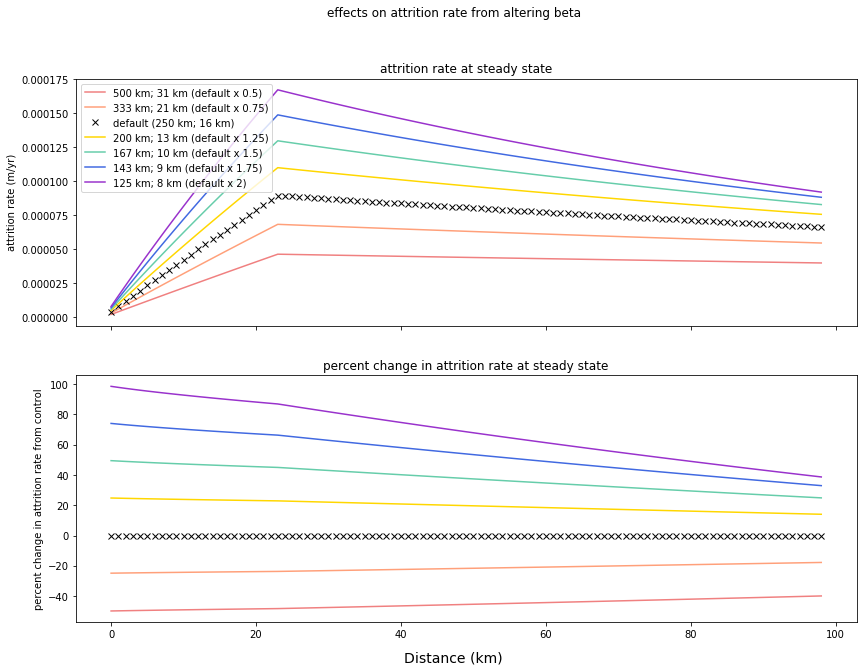

In [34]:
# now make some attrition plots

fig, axs = plt.subplots(2, figsize = (14, 10), sharex = True, sharey = False)
fig.suptitle('effects on attrition rate from altering beta')
fig.text(0.5, 0.07, 'Distance (km)', ha='center', fontsize = 14)


axs[0].plot(x[:-1]/1000, attrition_rate_exp7, label = '500 km; 31 km (default x 0.5)', color = 'lightcoral')
axs[0].plot(x[:-1]/1000, attrition_rate_exp8, label = '333 km; 21 km (default x 0.75)', color = 'lightsalmon')
axs[0].plot(x[:-1]/1000, attrition_rate_control, 'x', label = 'default (250 km; 16 km)', color = 'k')
axs[0].plot(x[:-1]/1000, attrition_rate_exp9, label = '200 km; 13 km (default x 1.25)', color = 'gold')
axs[0].plot(x[:-1]/1000, attrition_rate_exp10, label = '167 km; 10 km (default x 1.5)', color = 'mediumaquamarine')
axs[0].plot(x[:-1]/1000, attrition_rate_exp11, label = '143 km; 9 km (default x 1.75)', color = 'royalblue')
axs[0].plot(x[:-1]/1000, attrition_rate_exp12, label = '125 km; 8 km (default x 2)', color = 'darkorchid')
axs[0].legend()
axs[0].set_title('attrition rate at steady state')
axs[0].set_ylabel('attrition rate (m/yr)')

axs[1].plot(x[:-1]/1000, change7, color = 'lightcoral')
axs[1].plot(x[:-1]/1000, change8, color = 'lightsalmon')
axs[1].plot(x[:-1]/1000, change0_atr, 'x', color = 'k')
axs[1].plot(x[:-1]/1000, change9, color = 'gold')
axs[1].plot(x[:-1]/1000, change10, color = 'mediumaquamarine')
axs[1].plot(x[:-1]/1000, change11, color = 'royalblue')
axs[1].plot(x[:-1]/1000, change12, color = 'darkorchid')
axs[1].set_title('percent change in attrition rate at steady state')
axs[1].set_ylabel('percent change in attrition rate from control')

# plt.savefig('/Users/vanessa/Desktop/FA 2021/outputs for 11_10_21 meeting/attrition.png')

In [35]:
# testing out our "break at steady state" loop again


test_array = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

for i in range(len(test_array)):
    test_array += 1
    
    if any(test_array[:] < 10):
        continue
    else:
        break

In [36]:
test_array

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [37]:
i

4

In [38]:
len(test_array)

11

In [39]:
# OKAY, SO THIS REALLY LOOKS LIKE IT SHOULD WORK IN OUR LOOP

In [40]:
# alright, so now moving on to possibly the most interesting part:
# changing the "uplift number" and seeing how time to steady state changes! wahoo!
# uplift number is U/cr
# if change c, must also change stuff in DTL/TPL ratio
# so easier to change either U or r
# we'll start with altering U
# default baselevel rate is 0.001

In [41]:
# exp 13
exp_13 = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, 1, 1 * 0.25]

# exp 14
exp_14 = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, 1, 1 * 0.5]

# exp 15
exp_15 = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, 1, 1 * 2]

# exp 16
exp_16 = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, 1, 1 * 3]

# exp 17
exp_17 = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, 1, 1 * 4]

# exp 18
exp_18 = [x, dx, Hstar, H, etab, eta, beta_ig, beta_sed, atr_factor, k_ig, k_sed, 1, 1 * 5]


In [42]:
# unpack and run these experiments

# exp 13
(slope_exp13,
 sed_flux_exp13,
 e_factor_exp13,
 topography_exp13,
 bedrock_elevation_exp13,
 igneous_plucking_rate_exp13,
 sedimentary_plucking_rate_exp13,
 igneous_abrasion_rate_exp13,
 sedimentary_abrasion_rate_exp13,
 bedrock_erosion_rate_exp13,
 total_plucking_ig_exp13,
 total_plucking_sed_exp13,
 total_plucking_exp13,
 attrition_rate_exp13,
 sedimentation_rate_exp13,
 sediment_thickness_exp13,
 total_erosion_rate_exp13,
 cum_time_exp13) = two_lith_one_sed(*exp_13)

# exp 14
(slope_exp14,
 sed_flux_exp14,
 e_factor_exp14,
 topography_exp14,
 bedrock_elevation_exp14,
 igneous_plucking_rate_exp14,
 sedimentary_plucking_rate_exp14,
 igneous_abrasion_rate_exp14,
 sedimentary_abrasion_rate_exp14,
 bedrock_erosion_rate_exp14,
 total_plucking_ig_exp14,
 total_plucking_sed_exp14,
 total_plucking_exp14,
 attrition_rate_exp14,
 sedimentation_rate_exp14,
 sediment_thickness_exp14,
 total_erosion_rate_exp14,
 cum_time_exp14) = two_lith_one_sed(*exp_14)

# exp 15
(slope_exp15,
 sed_flux_exp15,
 e_factor_exp15,
 topography_exp15,
 bedrock_elevation_exp15,
 igneous_plucking_rate_exp15,
 sedimentary_plucking_rate_exp15,
 igneous_abrasion_rate_exp15,
 sedimentary_abrasion_rate_exp15,
 bedrock_erosion_rate_exp15,
 total_plucking_ig_exp15,
 total_plucking_sed_exp15,
 total_plucking_exp15,
 attrition_rate_exp15,
 sedimentation_rate_exp15,
 sediment_thickness_exp15,
 total_erosion_rate_exp15,
 cum_time_exp15) = two_lith_one_sed(*exp_15)

# exp 16
(slope_exp16,
 sed_flux_exp16,
 e_factor_exp16,
 topography_exp16,
 bedrock_elevation_exp16,
 igneous_plucking_rate_exp16,
 sedimentary_plucking_rate_exp16,
 igneous_abrasion_rate_exp16,
 sedimentary_abrasion_rate_exp16,
 bedrock_erosion_rate_exp16,
 total_plucking_ig_exp16,
 total_plucking_sed_exp16,
 total_plucking_exp16,
 attrition_rate_exp16,
 sedimentation_rate_exp16,
 sediment_thickness_exp16,
 total_erosion_rate_exp16,
 cum_time_exp16) = two_lith_one_sed(*exp_16)

# exp 17
(slope_exp17,
 sed_flux_exp17,
 e_factor_exp17,
 topography_exp17,
 bedrock_elevation_exp17,
 igneous_plucking_rate_exp17,
 sedimentary_plucking_rate_exp17,
 igneous_abrasion_rate_exp17,
 sedimentary_abrasion_rate_exp17,
 bedrock_erosion_rate_exp17,
 total_plucking_ig_exp17,
 total_plucking_sed_exp17,
 total_plucking_exp17,
 attrition_rate_exp17,
 sedimentation_rate_exp17,
 sediment_thickness_exp17,
 total_erosion_rate_exp17,
 cum_time_exp17) = two_lith_one_sed(*exp_17)

# exp 18
(slope_exp18,
 sed_flux_exp18,
 e_factor_exp18,
 topography_exp18,
 bedrock_elevation_exp18,
 igneous_plucking_rate_exp18,
 sedimentary_plucking_rate_exp18,
 igneous_abrasion_rate_exp18,
 sedimentary_abrasion_rate_exp18,
 bedrock_erosion_rate_exp18,
 total_plucking_ig_exp18,
 total_plucking_sed_exp18,
 total_plucking_exp18,
 attrition_rate_exp18,
 sedimentation_rate_exp18,
 sediment_thickness_exp18,
 total_erosion_rate_exp18,
 cum_time_exp18) = two_lith_one_sed(*exp_18)

6868694.94944303
3434347.474721515
858586.8686803788
572391.245784734
429293.4343401894
343434.74747041636


Text(0, 0.5, 'time to steady state (yr)')

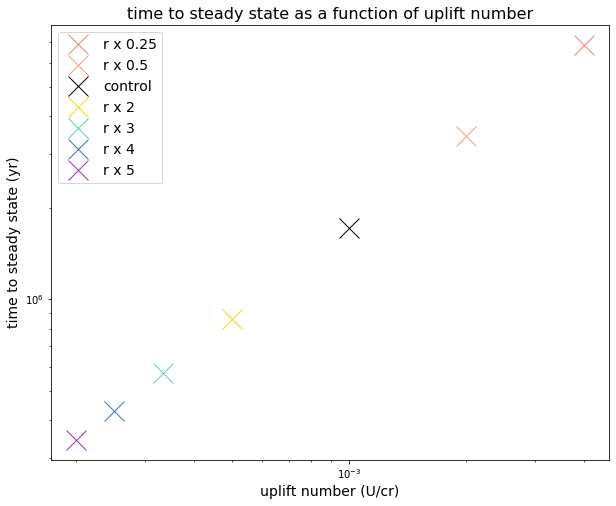

In [43]:
un_control = 0.001/(1 * 1)
un_13 = 0.001/(1 * 0.25)
un_14 = 0.001/(1 * 0.5)
un_15 = 0.001/(1 * 2)
un_16 = 0.001/(1 * 3)
un_17 = 0.001/(1 * 4)
un_18 = 0.001/(1 * 5)

plt.figure(figsize = (10, 8))

plt.plot(un_13, cum_time_exp13, 'x', markersize = 20, label = 'r x 0.25', color = 'lightcoral')
plt.plot(un_14, cum_time_exp14, 'x', markersize = 20, label = 'r x 0.5', color = 'lightsalmon')
plt.plot(un_control, cum_time_control, 'x', markersize = 20, label = 'control', color = 'k')
plt.plot(un_15, cum_time_exp15, 'x', markersize = 20, label = 'r x 2', color = 'gold')
plt.plot(un_16, cum_time_exp16, 'x', markersize = 20, label = 'r x 3', color = 'mediumaquamarine')
plt.plot(un_17, cum_time_exp17, 'x', markersize = 20, label = 'r x 4', color = 'royalblue')
plt.plot(un_18, cum_time_exp18, 'x', markersize = 20, label = 'r x 5', color = 'darkorchid')
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize = 14)
plt.title('time to steady state as a function of uplift number', fontsize = 16)
plt.xlabel('uplift number (U/cr)', fontsize = 14)
plt.ylabel('time to steady state (yr)', fontsize = 14)

# plt.savefig('/Users/vanessa/Desktop/FA 2021/outputs for 11_10_21 meeting/uplift number.png')

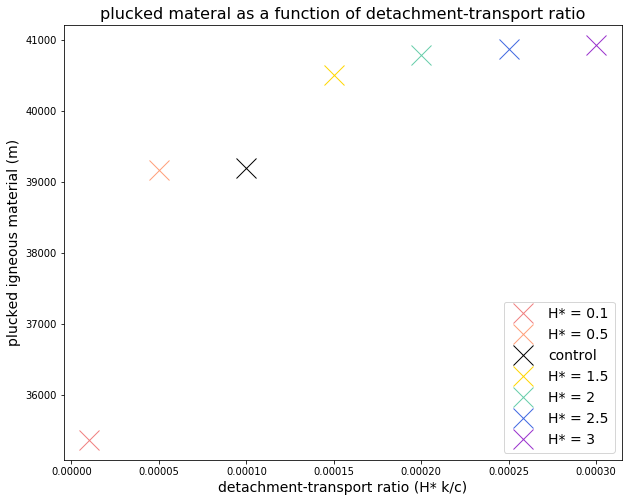

In [50]:
# now quickly make a plot showing how plucking rate changes with DTL/TPL #

dtl_1 = ((Hstar * 0.1)*0.0001) # c is 1, so no need to divide by it
dtl_2 = ((Hstar * 0.5)*0.0001)
dtl_3 = ((Hstar * 1.5)*0.0001)
dtl_4 = ((Hstar * 2)*0.0001)
dtl_5 = ((Hstar * 2.5)*0.0001)
dtl_6 = ((Hstar * 3)*0.0001)
dtl_control = ((Hstar * 1) * 0.0001)

plt.figure(figsize = (10, 8))

plt.plot(dtl_1, np.sum(total_plucking_ig_exp1), 'x', markersize = 20, label = 'H* = 0.1', color = 'lightcoral')
plt.plot(dtl_2, np.sum(total_plucking_ig_exp2), 'x', markersize = 20, label = 'H* = 0.5', color = 'lightsalmon')
plt.plot(dtl_control, np.sum(total_plucking_ig_control), 'x', markersize = 20, label = 'control', color = 'k')
plt.plot(dtl_3, np.sum(total_plucking_ig_exp3), 'x', markersize = 20, label = 'H* = 1.5', color = 'gold')
plt.plot(dtl_4, np.sum(total_plucking_ig_exp4), 'x', markersize = 20, label = 'H* = 2', color = 'mediumaquamarine')
plt.plot(dtl_5, np.sum(total_plucking_ig_exp5), 'x', markersize = 20, label = 'H* = 2.5', color = 'royalblue')
plt.plot(dtl_6, np.sum(total_plucking_ig_exp6), 'x', markersize = 20, label = 'H* = 3', color = 'darkorchid')
# plt.yscale('log')
# plt.xscale('log')
plt.legend(fontsize = 14)
plt.title('plucked materal as a function of detachment-transport ratio', fontsize = 16)
plt.xlabel('detachment-transport ratio (H* k/c)', fontsize = 14)
plt.ylabel('plucked igneous material (m)', fontsize = 14)

plt.savefig('/Users/vanessa/Desktop/FA 2021/outputs for 11_10_21 meeting/transport ratio.png')